In [1]:
import pandas as pd

!ls

01-NEISS_(merging,dates,times).ipynb
02-Medical_Examiner_Case_Archive(displayoptions_regex_dates_times).ipynb
03-Credit_cards_(scraping_downloading_globbing_combining).ipynb
Medical_Examiner_Case_Archive.csv
neiss2021-fixed.xlsx


Two ways to read in an excel file. The first one ``df = pd.read_excel("neiss2021-fixed.xlsx")`` works but it takes a long time... And it only reads in the first sheet (and ignores the rest if there is more than one sheet). To solve this, we can use ``format.df = pd.read_excel("neiss2021-fixed.xlsx", sheet_name = "NEISS_FMT")``.
We can then read in every sheet as a new dataframe... But that takes a long time and a lot of code. And we don't want to repeat ourselves – there is probably another (better) way to do it.

Instead we can use ``excel = pd.ExcelFile("neiss2021-fixed.xlsx")``. Then we get all the sheets! In one command! 

In [2]:
df = pd.read_excel("neiss2021-fixed.xlsx")
df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
0,210102715,2021-01-01,38,2,2,NaN,2,31,71,BACK PAIN,...,0,4056,0,0,0,0,"38YOF REACHED FOR OBJECT OFF SHELF, DEVELOPED ...",V,25,15.4438
1,210102719,2021-01-01,65,1,4,NaN,2,34,57,NaN,...,0,1842,0,0,0,0,65YOM MISSED STEP WHILE GOING UP STAIRS AND FE...,V,25,15.4438
2,210102730,2021-01-01,32,2,2,NaN,2,79,71,ABDOMINAL PAIN,...,0,604,0,0,0,0,"32YOF WAS PUSHING DRESSER, PT 7-8 WKS PREGNANT...",V,25,15.4438
3,210102742,2021-01-02,42,2,2,NaN,2,75,62,NaN,...,0,1842,0,0,0,0,42YOF SLIPPED AND FELL ON ICE WHILE WALKING DO...,V,25,15.4438
4,210102743,2021-01-02,22,2,1,NaN,1,35,64,NaN,...,0,3283,0,0,0,0,"22YOF WAS SKIING, WHILE WALKING BACK TO TAKE O...",V,25,15.4438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340437,220316310,2021-08-29,207,2,2,NaN,2,92,72,NaN,...,0,1659,0,0,0,0,7MOF WITH MOTHER WHO STATES SHE WAS CUTTING PT...,V,40,17.0695
340438,220316311,2021-08-29,10,1,1,NaN,2,93,53,NaN,...,0,676,0,0,0,0,10YOM WS RUNNING AND STUBBED HIS RIGHT GREAT T...,V,40,17.0695
340439,220332765,2021-01-26,7,2,1,NaN,2,79,53,NaN,...,0,1842,0,0,0,0,7YOF C/O OF LEFT FLANK PAIN. PTS MOTHER STATES...,S,4,68.9457
340440,220363401,2021-12-05,16,1,1,NaN,2,85,74,NaN,...,0,1333,0,0,0,0,16 YOM WAS SKATEBOARDING OUTSIDE AT SKATE PARK...,L,5,57.0141


In [11]:
excel = pd.ExcelFile("neiss2021-fixed.xlsx")

In [ ]:
# To get the sheet names, we do like this:
excel.sheet_names

In [10]:
# And to read individual sheets of the dataframe we can use .parse
format_df = excel.parse('NEISS_FMT')
data_df = excel.parse('NEISS_2021')

In [15]:
pd.options.display.max_columns = None
# If we want to see all the columns do this ^

pd.options.display.max_colwidth = None
# If we want to see the full content of the columns do this ^

data_df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
0,210102715,2021-01-01,38,2,2,NaN,2,31,71,BACK PAIN,NaN,NaN,NaN,1,0,0,4056,0,0,0,0,"38YOF REACHED FOR OBJECT OFF SHELF, DEVELOPED BACK PAIN, DX BACK PAIN",V,25,15.4438
1,210102719,2021-01-01,65,1,4,NaN,2,34,57,NaN,NaN,NaN,NaN,1,0,0,1842,0,0,0,0,"65YOM MISSED STEP WHILE GOING UP STAIRS AND FELL BACKWARD, DX FX WRIST",V,25,15.4438
2,210102730,2021-01-01,32,2,2,NaN,2,79,71,ABDOMINAL PAIN,NaN,NaN,NaN,1,0,0,604,0,0,0,0,"32YOF WAS PUSHING DRESSER, PT 7-8 WKS PREGNANT, DX ABDOMINAL PAIN",V,25,15.4438
3,210102742,2021-01-02,42,2,2,NaN,2,75,62,NaN,35.0,71.0,KNEE PAIN,1,0,0,1842,0,0,0,0,"42YOF SLIPPED AND FELL ON ICE WHILE WALKING DOWN STAIRS, FELL DOWN 5 STEPS, HIT HEAD WITH LOC, DX KNEE, WRIST PAIN WITH HEAD INJURY",V,25,15.4438
4,210102743,2021-01-02,22,2,1,NaN,1,35,64,NaN,NaN,NaN,NaN,1,0,0,3283,0,0,0,0,"22YOF WAS SKIING, WHILE WALKING BACK TO TAKE OFF SKIS, PT SLIPPED AND FELL BACKWARD, TWISTED KNEE, DX SPRAINED KNEE",V,25,15.4438


In [ ]:
# Last time we used regular expressions, but there is a better way. Maybe we can use the product codes:

 

In [16]:
# To only get the product codes and not all the other codes, we sort the data.
product_codes = format_df[format_df['Format name'] == 'PROD']
product_codes.head()

,Format name,Starting value for format,Ending value for format,Format value label
120,PROD,101,101,101 - WASHING MACHINES WITHOUT WRINGERS OR OTHER DRYERS
121,PROD,102,102,102 - WRINGER WASHING MACHINES
122,PROD,103,103,103 - WASHING MACHINES WITH UNHEATED SPIN DRYERS
123,PROD,106,106,106 - ELECTRIC CLOTHES DRYERS WITHOUT WASHERS
124,PROD,107,107,107 - GAS CLOTHES DRYERS WITHOUT WASHERS


In [27]:
# and then we can merge the product codes with our accident data.
# Product_1 is the column with the product codes in our accident data, while "Starting value for format" is the column
# with the product codes in the code data.
#data_df.merge(product_codes, left_on = "Product_1", right_on = "Starting value for format")

# But oh no! "Starting value for format" is a string. We must convert it into a float

product_codes["Starting value for format"] = product_codes["Starting value for format"].astype(float)

# But oh no! Some of the data disappears! Because in some rows, there is no product code, so by default it drops
# anything that doesn't have a match because the default is how = 'inner'. So we add , how = left


merged = data_df.merge(product_codes, how = 'left', left_on = "Product_1", right_on = "Starting value for format")

merged.head(40)

/var/folders/z4/gtqzrf5n5wd4n_kq0jll0wfc0000gn/T/ipykernel_83269/2112515097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_codes["Starting value for format"] = product_codes["Starting value for format"].astype(float)


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight,Format name,Starting value for format,Ending value for format,Format value label
0,210102715,2021-01-01,38,2,2,NaN,2,31,71,BACK PAIN,NaN,NaN,NaN,1,0,0,4056,0,0,0,0,"38YOF REACHED FOR OBJECT OFF SHELF, DEVELOPED BACK PAIN, DX BACK PAIN",V,25,15.4438,PROD,4056.0,4056,"4056 - CABINETS, RACKS, ROOM DIVIDERS AND SHELVES, NEC"
1,210102719,2021-01-01,65,1,4,NaN,2,34,57,NaN,NaN,NaN,NaN,1,0,0,1842,0,0,0,0,"65YOM MISSED STEP WHILE GOING UP STAIRS AND FELL BACKWARD, DX FX WRIST",V,25,15.4438,PROD,1842.0,1842,1842 - STAIRS OR STEPS
2,210102730,2021-01-01,32,2,2,NaN,2,79,71,ABDOMINAL PAIN,NaN,NaN,NaN,1,0,0,604,0,0,0,0,"32YOF WAS PUSHING DRESSER, PT 7-8 WKS PREGNANT, DX ABDOMINAL PAIN",V,25,15.4438,PROD,604.0,604,"604 - DESKS, CHESTS, BUREAUS OR BUFFETS"
3,210102742,2021-01-02,42,2,2,NaN,2,75,62,NaN,35.0,71.0,KNEE PAIN,1,0,0,1842,0,0,0,0,"42YOF SLIPPED AND FELL ON ICE WHILE WALKING DOWN STAIRS, FELL DOWN 5 STEPS, HIT HEAD WITH LOC, DX KNEE, WRIST PAIN WITH HEAD INJURY",V,25,15.4438,PROD,1842.0,1842,1842 - STAIRS OR STEPS
4,210102743,2021-01-02,22,2,1,NaN,1,35,64,NaN,NaN,NaN,NaN,1,0,0,3283,0,0,0,0,"22YOF WAS SKIING, WHILE WALKING BACK TO TAKE OFF SKIS, PT SLIPPED AND FELL BACKWARD, TWISTED KNEE, DX SPRAINED KNEE",V,25,15.4438,PROD,3283.0,3283,"3283 - SNOW SKIING (ACTIVITY, APPAREL OR EQUIPMENT)"
5,210102744,2021-01-02,53,2,2,NaN,2,93,59,NaN,NaN,NaN,NaN,1,1,0,478,4057,4076,0,0,"53YOF GOT UP FROM BED, KNOCKED OVER GLASS ON NITESTAND WHICH FELL ON FOOT, DX LAC TO TOE",V,25,15.4438,PROD,478.0,478,"478 - DRINKING GLASSES, CUPS, AND MUGS"
6,210102751,2021-01-02,28,2,2,NaN,2,92,71,THUMB INJURY,NaN,NaN,NaN,1,0,0,1141,450,0,0,0,"28YOF ACCIDENTALLY POKED SELF WITH SCISSORS WHILE OPENING A PACKAGE ON CHRISTMAS, DX THUMB INJURY",V,25,15.4438,PROD,1141.0,1141,"1141 - CONTAINERS, NOT SPECIFIED"
7,210102854,2021-01-01,9,2,1,NaN,2,32,57,NaN,NaN,NaN,NaN,1,9,0,1272,0,0,0,0,9YOF WAS ON GYMNASTICS RINGS AND FELL OFF THE RINGS ONTO HER LEFT ARM DX: CLOSED NONDISPLACED AVULSION FRACTURE OF MEDIAL EPICONDYLE OF LEFT HUMERUS OF LEFT ELBOW,S,46,68.9457,PROD,1272.0,1272,1272 - GYMNASTICS AND ASSOCIATED EQUIPMENT
8,210102856,2021-01-01,34,1,1,NaN,2,82,57,NaN,NaN,NaN,NaN,1,1,0,1884,0,0,0,0,34YOM STRUCK HIS HAND AGAINST A WALL DX: OPEN DISPLACED FRACTURE OF SHAFT OF FIFTH METACARPAL BONE OF RIGHT HAND,S,46,68.9457,PROD,1884.0,1884,1884 - CEILINGS AND WALLS (INTERIOR PART OF COMPLETED STRUCTURE)
9,210102858,2021-01-01,6,2,3,UNKNOWN,1,75,62,NaN,76.0,59.0,NaN,1,1,0,1864,1807,0,0,0,6YOF WAS CLIMBING ON A COUNTER AT HOME AND FELL IMPACTING THE FLOOR DX: INJURY OF HEAD AND LACERATION OF FOREHEAD,S,46,68.9457,PROD,1864.0,1864,1864 - COUNTERS OR COUNTERTOPS


In [31]:
# If we are only interested in a few columns, we can do like this:
merged = merged[['Product_1','Format value label','Narrative_1', 'Age','Sex','Race','Treatment_Date']]
# Here we only selected the columns we are interested in and saved them in the data frame 
merged.head(20)

,Product_1,Format value label,Narrative_1,Age,Sex,Race,Treatment_Date
0,4056,"4056 - CABINETS, RACKS, ROOM DIVIDERS AND SHELVES, NEC","38YOF REACHED FOR OBJECT OFF SHELF, DEVELOPED BACK PAIN, DX BACK PAIN",38,2,2,2021-01-01
1,1842,1842 - STAIRS OR STEPS,"65YOM MISSED STEP WHILE GOING UP STAIRS AND FELL BACKWARD, DX FX WRIST",65,1,4,2021-01-01
2,604,"604 - DESKS, CHESTS, BUREAUS OR BUFFETS","32YOF WAS PUSHING DRESSER, PT 7-8 WKS PREGNANT, DX ABDOMINAL PAIN",32,2,2,2021-01-01
3,1842,1842 - STAIRS OR STEPS,"42YOF SLIPPED AND FELL ON ICE WHILE WALKING DOWN STAIRS, FELL DOWN 5 STEPS, HIT HEAD WITH LOC, DX KNEE, WRIST PAIN WITH HEAD INJURY",42,2,2,2021-01-02
4,3283,"3283 - SNOW SKIING (ACTIVITY, APPAREL OR EQUIPMENT)","22YOF WAS SKIING, WHILE WALKING BACK TO TAKE OFF SKIS, PT SLIPPED AND FELL BACKWARD, TWISTED KNEE, DX SPRAINED KNEE",22,2,1,2021-01-02
5,478,"478 - DRINKING GLASSES, CUPS, AND MUGS","53YOF GOT UP FROM BED, KNOCKED OVER GLASS ON NITESTAND WHICH FELL ON FOOT, DX LAC TO TOE",53,2,2,2021-01-02
6,1141,"1141 - CONTAINERS, NOT SPECIFIED","28YOF ACCIDENTALLY POKED SELF WITH SCISSORS WHILE OPENING A PACKAGE ON CHRISTMAS, DX THUMB INJURY",28,2,2,2021-01-02
7,1272,1272 - GYMNASTICS AND ASSOCIATED EQUIPMENT,9YOF WAS ON GYMNASTICS RINGS AND FELL OFF THE RINGS ONTO HER LEFT ARM DX: CLOSED NONDISPLACED AVULSION FRACTURE OF MEDIAL EPICONDYLE OF LEFT HUMERUS OF LEFT ELBOW,9,2,1,2021-01-01
8,1884,1884 - CEILINGS AND WALLS (INTERIOR PART OF COMPLETED STRUCTURE),34YOM STRUCK HIS HAND AGAINST A WALL DX: OPEN DISPLACED FRACTURE OF SHAFT OF FIFTH METACARPAL BONE OF RIGHT HAND,34,1,1,2021-01-01
9,1864,1864 - COUNTERS OR COUNTERTOPS,6YOF WAS CLIMBING ON A COUNTER AT HOME AND FELL IMPACTING THE FLOOR DX: INJURY OF HEAD AND LACERATION OF FOREHEAD,6,2,3,2021-01-01


In [34]:
# If we want only cases where a book was involved, do like this!
merged[merged['Format value label'].str.contains('BOOK', na=False)]

,Product_1,Format value label,Narrative_1,Age,Sex,Race,Treatment_Date
129,692,692 - MAGAZINE RACKS OR BOOK ENDS,3 YOF'S SISTER DRDOPPED A TEN POUND BOOKEND ONTO FOOT DX: RT FOOT INJURY,3,2,4,2021-01-01
439,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS","34 YOF FELL AT GROUP HOME TRYING TO PUT UP A BOOK DX; CHI, FACE ABRASION",34,2,1,2021-01-02
2456,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS",17YOM CUT FINGER ON A 3 RING BINDER--DX:LAC FINGER,17,1,0,2021-01-06
2703,5011,"5011 - BOOK BAGS OR BACK CARRIERS (EXC. BABY CARR. LUGGAGE, CAM",16YOF TRIPPED OVER BOOK BAG AND TWISTED ANKLE DX FIB FX,16,2,0,2021-01-02
3757,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS",14 YOF PUNCHED A BOOK WITH HER FIST. DX HAND CONTUSION,14,2,1,2021-01-10
...,...,...,...,...,...,...,...
332020,5011,"5011 - BOOK BAGS OR BACK CARRIERS (EXC. BABY CARR. LUGGAGE, CAM","50YOM, REPORTS CARRYING A 50LB BACKPACK DAILY WHILE RIDING ON HIS BIKE TO WORK AND DEVELOPED, DX: ACUTE PAIN OF LEFT SHOULDER",50,1,1,2021-12-17
332921,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS","14YOF WHO PRESENTS W/ R EYE PAIN AFTER ""SCRATCHING' IT W/ THE CORNER OF A PLASTIC NOTEBOOK. PULLED NOTEBOOK OUT OF HER BACKPACK CAME OUT QUICKLY, CORNER OF PLASTIC NOTEBOOK MADE CONTACT W/ EYE. DX: R CORNEAL ABRASION",14,2,0,2021-12-01
333146,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS",73 YOF PICKED UP A BOOK OFF OF THE FLOOR AND STRAINED HER SHOULDER. DX: LEFT SHOULDER STRAIN.,73,2,1,2021-10-29
337767,4047,"4047 - BOOKS, MAGAZINES, ALBUMS OR SCRAPBOOKS","8YOF PT WITH HEADACHE AFTER A BOOK WAS THROWN AND STRUCK HER IN THE HEAD WHILE AT SCHOOL. DX: HEAD INJURY, HEAD LACERATION.",8,2,0,2021-12-11


In [37]:
# Dates and times!

# What is the most dangerous day of the week?
data_df.Treatment_Date

# But how do we find the weekday?

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-02
4        2021-01-02
            ...    
340437   2021-08-29
340438   2021-08-29
340439   2021-01-26
340440   2021-12-05
340441   2021-10-31
Name: Treatment_Date, Length: 340442, dtype: datetime64[ns]

In [42]:
# We want to get a datetime thing to our column. So we use dt and then add .day_of_week
data_df.Treatment_Date.dt.day_of_week

0         4
1         4
2         4
3         5
4         5
         ..
340437    6
340438    6
340439    1
340440    6
340441    6
Name: Treatment_Date, Length: 340442, dtype: int64

In [41]:
# And then we count
data_df.Treatment_Date.dt.day_of_week.value_counts()
# Looks like Saturday is the most dangerous day of the week

5    51440
6    50514
0    50235
1    47691
4    47211
3    46728
2    46623
Name: Treatment_Date, dtype: int64

<AxesSubplot: >

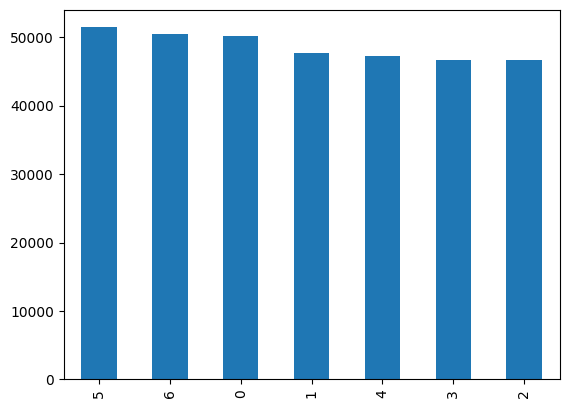

In [47]:
data_df.Treatment_Date.dt.day_of_week.value_counts().plot(kind = 'bar')

<AxesSubplot: >

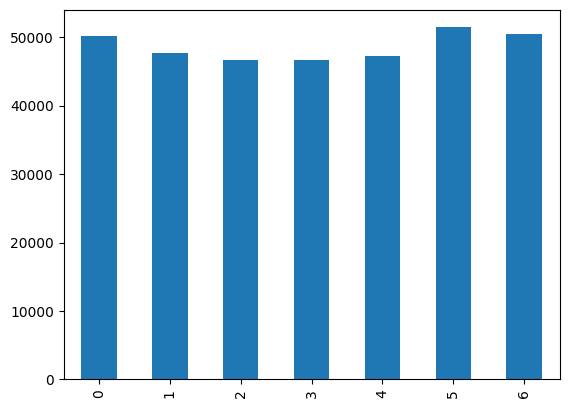

In [46]:
# But that was sorted in the weird way – by values instead of days. We want to sort by index using .sort_index()

data_df.Treatment_Date.dt.day_of_week.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
excel = pd.ExcelFile("annual-data.xlsx")

In [ ]:
# List comprehensions. To combine a bunch of dataframes, we use pd.concat
# pd.concat
df2011 = excel.parse('2011')
df2012 = excel.parse('2012')
df2013 = excel.parse('2013')

In [ ]:
# to combine all three we can do:

pd.concat([df2011, df2012, df2013], ignore_index=True])

#Use the ignore_index=True to avoid the repetition of index numbers from each dataframe. 

In [ ]:
# But instead we can convert a list of sheet names into a list of dataframes.
# 2011 --> excel.parse("2011") --> a dataframe
# 2012 --> excel.parse("2012") --> a dataframe
# 2013 --> excel.parse("2013") --> a dataframe

# But that is still repetition. For that we can use list comprehension


dataframes = [excel.parse(sheet_name) for sheet_name in excel.sheet_names]

# Then we get a list of dataframes and then we can look at them individually like 

dataframes[0]
dataframes[1]

# We can also then add all the dataframes together using pd.concat.

df = pd.concat(dataframes, ignore_index=True)